<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Sesiones/Sesion_01c_PruebasH_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#from libs.linear_reg import * 
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Pruebas de hipotesis 1

In [5]:

# Leer los datos
link="https://raw.githubusercontent.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/refs/heads/main/semestre2025-1/Sesiones/DataSet/baby.csv"
births = pd.read_csv(link)

# Hacer una copia
births = births.copy()

# Convertir unidades
births["Birth Weight"] = births["Birth Weight"] * 0.0283495
births["Maternal Height"] = births["Maternal Height"] * 0.0254
births["Maternal Pregnancy Weight"] = births["Maternal Pregnancy Weight"] * 0.453592


Maternal Smoker
False    715
True     459
dtype: int64


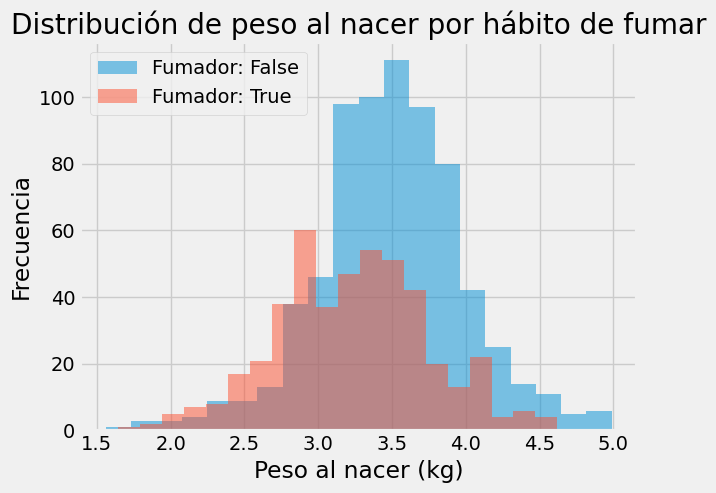

Maternal Smoker
False    3.489407
True     3.226717
Name: Birth Weight, dtype: float64


In [6]:
# Seleccionar columnas relevantes
fumador_peso_nacido = births[["Maternal Smoker", "Birth Weight"]]

# Agrupar por si la madre fumaba o no, contando registros
grupo = fumador_peso_nacido.groupby("Maternal Smoker").size()
print(grupo)

# Graficar histogramas separados por categoría de fumador
for categoria, grupo in fumador_peso_nacido.groupby("Maternal Smoker"):
    plt.hist(grupo["Birth Weight"], bins=20, alpha=0.5, label=f"Fumador: {categoria}")

plt.xlabel("Peso al nacer (kg)")
plt.ylabel("Frecuencia")
plt.title("Distribución de peso al nacer por hábito de fumar")
plt.legend()
plt.show()

# Calcular promedio de peso al nacer por hábito de fumar
peso_promedio = fumador_peso_nacido.groupby("Maternal Smoker")["Birth Weight"].mean()
print(peso_promedio)


**Hipotesis nula**: En la población, la distribución de los pesos natales de los bebés es la misma para las madres que no fuman que para las madres que lo hacen. La diferencia en la muestra se debe al azar.

**Hipotesis alternativa**: En la población, los bebés de las madres que fuman tienen un peso al nacer más bajo, en promedio, que los bebés de los no fumadores.

In [7]:
promedios = peso_promedio.values  
diferencia_observada = promedios[1] - promedios[0]
print("Diferencia Observada:", diferencia_observada)

Diferencia Observada: -0.2626905088456204


In [8]:
#Construyamos una funcion 
def diferencia_medias(df, group_label):
    means = df.groupby(group_label)["Birth Weight"].mean().values
    return means[1] - means[0]

In [9]:
print("Diferencia de medias real:", diferencia_medias(fumador_peso_nacido, 'Maternal Smoker'))

Diferencia de medias real: -0.2626905088456204


In [10]:
#Bootstrap
shuffled_labels = fumador_peso_nacido["Maternal Smoker"].sample(frac=1, replace=False).reset_index(drop=True)
original_and_shuffled = fumador_peso_nacido.copy()
original_and_shuffled["Shuffled Label"] = shuffled_labels
original_and_shuffled

,Maternal Smoker,Birth Weight,Shuffled Label
0,False,3.401940,True
1,False,3.203493,False
2,True,3.628736,True
3,True,3.061746,True
4,False,3.855532,True
...,...,...,...
1169,False,3.203493,False
1170,False,3.628736,False
1171,True,3.685435,False
1172,False,3.543687,True


In [11]:
shuffled_only = original_and_shuffled[["Birth Weight", "Shuffled Label"]]
# Diferencia de medias con etiquetas barajadas
print("Diferencia de medias barajada:", diferencia_medias(shuffled_only, "Shuffled Label"))

Diferencia de medias barajada: -0.05813994949342538


In [12]:
def diferentes_muestras():
    shuffled_labels = fumador_peso_nacido["Maternal Smoker"].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled_only = fumador_peso_nacido.copy()
    shuffled_only["Shuffled Label"] = shuffled_labels
    shuffled_only = shuffled_only[["Birth Weight", "Shuffled Label"]]
    return diferencia_medias(shuffled_only, "Shuffled Label")

In [13]:
diferencias = []

repetitions = 1000
for _ in range(repetitions):
    diferencias.append(diferentes_muestras())


diferencias_df = pd.DataFrame({"Diferencia": diferencias})


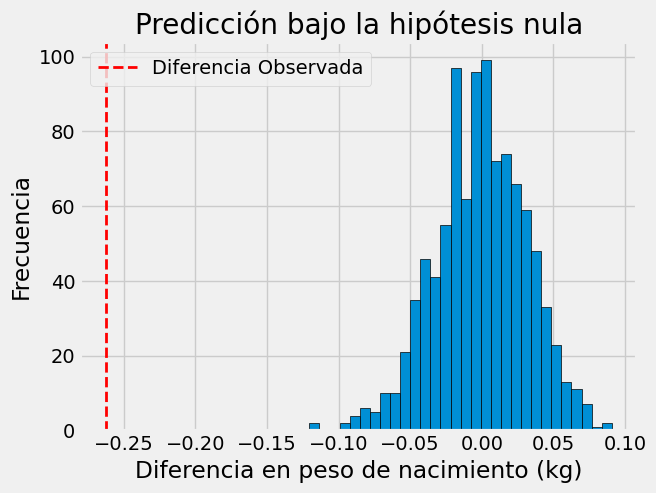

Diferencia Observada: -0.2626905088456204


In [14]:
# --- Graficar histograma ---
plt.hist(diferencias_df["Diferencia"], bins=30, edgecolor='black')
plt.axvline(diferencia_observada, color='red', linestyle='dashed', linewidth=2, label="Diferencia Observada")
plt.title("Predicción bajo la hipótesis nula")
plt.xlabel("Diferencia en peso de nacimiento (kg)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Mostrar la diferencia observada
print("Diferencia Observada:", diferencia_observada)


 Rechazamos la hipotesis nula

# Pruebas de hipotesis 2




In [15]:
#Estimador de la correlacion de Pearson
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r

In [16]:
#Datos Ejemplo 12.8 pagina 449 libro Marques (compartido en el classroom)

X = [
146,
205,
157,
165,
184,
153,
220,
181,
151,
188,
181,
163,
198,
193,
157
]
Y = [
181,
228,
182,
249,
259,
201,
339,
224,
112,
241,
225,
223,
257,
337,
197
]


# dictionary of lists
dict = {'X': X, 'Y': Y}
df = pd.DataFrame(dict)
n = len(df['X'])
print(df)

      X    Y
0   146  181
1   205  228
2   157  182
3   165  249
4   184  259
5   153  201
6   220  339
7   181  224
8   151  112
9   188  241
10  181  225
11  163  223
12  198  257
13  193  337
14  157  197


In [17]:
X = np.array(X)
Y = np.array(Y)
xus=(X-np.mean(X))/np.std(X)
yus=(Y-np.mean(Y))/np.std(Y)

In [18]:
(X.std()*Y.std()).mean()

1186.139082053748

In [19]:
(yus*xus).mean()

0.7850306676880592

In [20]:
#Determinacion del coeficiente de correlacion
r = pearson_correlation(df["X"], df["Y"])
print(f'El coeficiente de correlación lineal es: {round(r, 3)}')

El coeficiente de correlación lineal es: 0.785


In [21]:
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
intervalo = stats.t.interval(0.95, n-2, loc=0, scale=1)
print(f'El estimador es: {round(t, 3)}')
print(f'El intervalo es: [ {round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

El estimador es: 4.569
El intervalo es: [ -2.1604 , 2.1604]


In [22]:
# El estimador está fuera del intervalo y la hipotesis nula de no correlacion se rechaza.

## Prueba de hipótesis sobre la correlación

- **Hipótesis nula** $ H_0 $: no hay correlación real $\rho = 0 $.
- **Hipótesis alternativa** $ H_1 $: sí hay correlación $ \rho \neq 0 $.

Transformación para convertir el coeficiente de correlación \( r \) en un valor \( t \):

$$
t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}}
$$

Este valor \( t \) se puede comparar con los valores críticos de una **distribución t de Student** con \( n-2 \) grados de libertad.

Después de calcular \( t \), se puede:
- Obtener un **p-valor**.
- **Decidir** si rechazas o no rechazas la hipótesis nula.
